<a href="https://colab.research.google.com/github/kylemcq13/Projects/blob/master/16_6_Data_Exploration_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 16.6 Data Exploration 2

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

In [0]:
#upload the data from SQL
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine2)

engine2.dispose()

In [0]:
#preview the dataset
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

In [0]:
#male vs female scores
student_dfgender = student_df.groupby('gender').mean()[['math score', 'reading score', 'writing score']].reset_index()
student_dfgender

,gender,math score,reading score,writing score
0,female,63.633205,72.608108,72.467181
1,male,68.728216,65.473029,63.311203


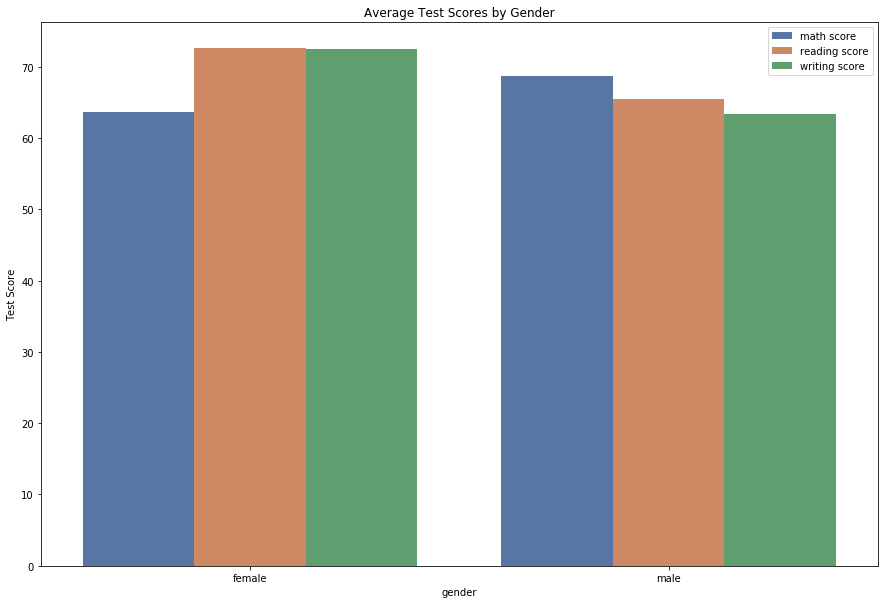

In [0]:
#graph the male vs female data
student_dfgender2 = student_dfgender.melt('gender', var_name='cols', value_name='vals')

plt.figure(figsize=(15,10))
ax = sns.barplot(x='gender', y='vals', hue='cols', palette='deep', data=student_dfgender2)
ax.set(title='Average Test Scores by Gender', ylabel='Test Score')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.legend(handles=handles[0:], labels=labels[0:])

In [0]:
#male vs female statistical significance
ttest_ind(student_df[student_df.gender == 'female'][['math score', 'reading score', 'writing score']],
         student_df[student_df.gender == 'male'][['math score', 'reading score', 'writing score']])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

Females seem to do better in reading and writing and males perform better.

In [0]:
#race/ethnicity vs test scores

student_df2 = student_df.groupby('race/ethnicity').mean()[['math score', 'reading score', 'writing score']].reset_index()
student_df2 = student_df2.rename(columns= {'race/ethnicity':'race'})
student_df2

,race,math score,reading score,writing score
0,group A,61.629213,64.674157,62.674157
1,group B,63.452632,67.352632,65.600000
2,group C,64.463950,69.103448,67.827586
3,group D,67.362595,70.030534,70.145038
4,group E,73.821429,73.028571,71.407143


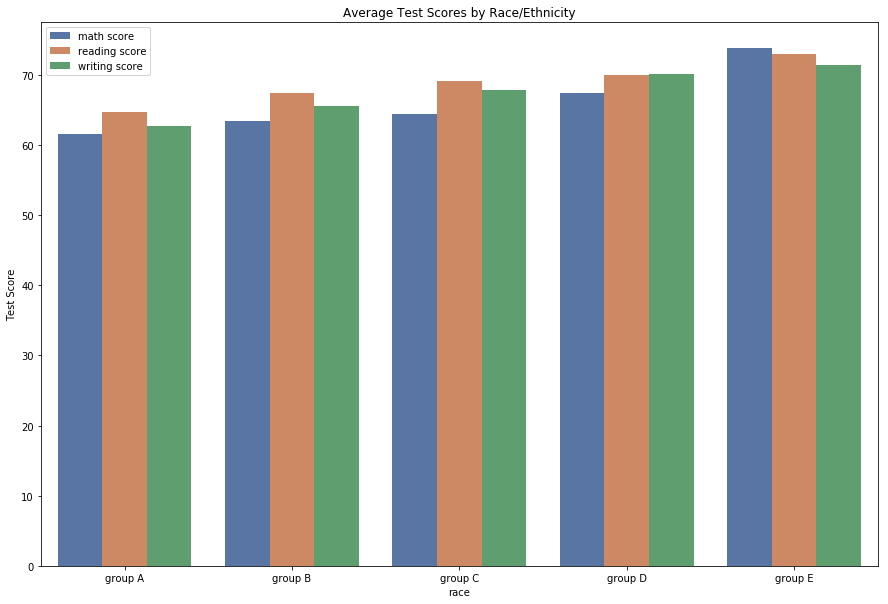

In [0]:
#graph the race/ethnicity vs test scores

student_dfrace = student_df2.melt('race', var_name='cols', value_name='vals')

plt.figure(figsize=(15,10))
ax = sns.barplot(x='race', y='vals', hue='cols', palette='deep', data=student_dfrace)
ax.set(title='Average Test Scores by Race/Ethnicity', ylabel='Test Score')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.legend(handles=handles[0:], labels=labels[0:])

In [0]:
#using pandas method

group_A = student_df.loc[student_df['race/ethnicity']=='group A'][['math score', 'reading score', 'writing score']]
group_B = student_df.loc[student_df['race/ethnicity']=='group B'][['math score', 'reading score', 'writing score']]
group_C = student_df.loc[student_df['race/ethnicity']=='group C'][['math score', 'reading score', 'writing score']]
group_D = student_df.loc[student_df['race/ethnicity']=='group D'][['math score', 'reading score', 'writing score']]
group_E = student_df.loc[student_df['race/ethnicity']=='group E'][['math score', 'reading score', 'writing score']]

print('Ttest for group A vs group B(math score, reading score, writing score): ',ttest_ind(group_A, group_B))
print('Ttest for group B vs group C(math score, reading score, writing score): ',ttest_ind(group_B, group_C))
print('Ttest for group B vs group E(math score, reading score, writing score): ',ttest_ind(group_B, group_E))
print('Ttest for group A vs group C(math score, reading score, writing score): ',ttest_ind(group_A, group_C))
print('Ttest for group C vs group D(math score, reading score, writing score): ',ttest_ind(group_C, group_D))
print('Ttest for group C vs group E(math score, reading score, writing score): ',ttest_ind(group_C, group_E))
print('Ttest for group A vs group D(math score, reading score, writing score): ',ttest_ind(group_A, group_D))
print('Ttest for group A vs group E(math score, reading score, writing score): ',ttest_ind(group_A, group_E))
print('Ttest for group D vs group E(math score, reading score, writing score): ',ttest_ind(group_D, group_E))

Ttest for group A vs group B(math score, reading score, writing score):  Ttest_indResult(statistic=array([-0.93550763, -1.36336823, -1.46244206]), pvalue=array([0.3503416 , 0.17387355, 0.14475374]))
Ttest for group B vs group C(math score, reading score, writing score):  Ttest_indResult(statistic=array([-0.73156699, -1.32231562, -1.59649634]), pvalue=array([0.46477089, 0.18665928, 0.1110011 ]))
Ttest for group B vs group E(math score, reading score, writing score):  Ttest_indResult(statistic=array([-6.00739705, -3.38606695, -3.38319783]), pvalue=array([5.00794605e-09, 7.95161850e-04, 8.03230049e-04]))
Ttest for group A vs group C(math score, reading score, writing score):  Ttest_indResult(statistic=array([-1.59972203, -2.57543222, -2.8488724 ]), pvalue=array([0.11043811, 0.0103644 , 0.00461069]))
Ttest for group C vs group D(math score, reading score, writing score):  Ttest_indResult(statistic=array([-2.41858625, -0.79701093, -1.88966315]), pvalue=array([0.01588835, 0.42577138, 0.05930

In [0]:
#using the for loop

race = student_df["race/ethnicity"].unique()
grouped_df = student_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(race)):
        for j in range(i+1, len(race)):
            print("t-test between groups {0} and {1}:".format(race[i], race[j]))
            print(stats.ttest_ind(
                student_df[student_df["race/ethnicity"]== race[i]][var], 
                student_df[student_df["race/ethnicity"]== race[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


There seem to be some ethnicity group statistical difference in test scores. Some groups, however, don't have statistical significance.

In [0]:
#parental level of education vs average test scores
student_df3 = student_df.groupby('parental level of education').mean()[['math score', 'reading score', 'writing score']].reset_index()
student_df3

,parental level of education,math score,reading score,writing score
0,associate's degree,67.882883,70.927928,69.896396
1,bachelor's degree,69.389831,73.000000,73.381356
2,high school,62.137755,64.704082,62.448980
3,master's degree,69.745763,75.372881,75.677966
4,some college,67.128319,69.460177,68.840708
5,some high school,63.497207,66.938547,64.888268


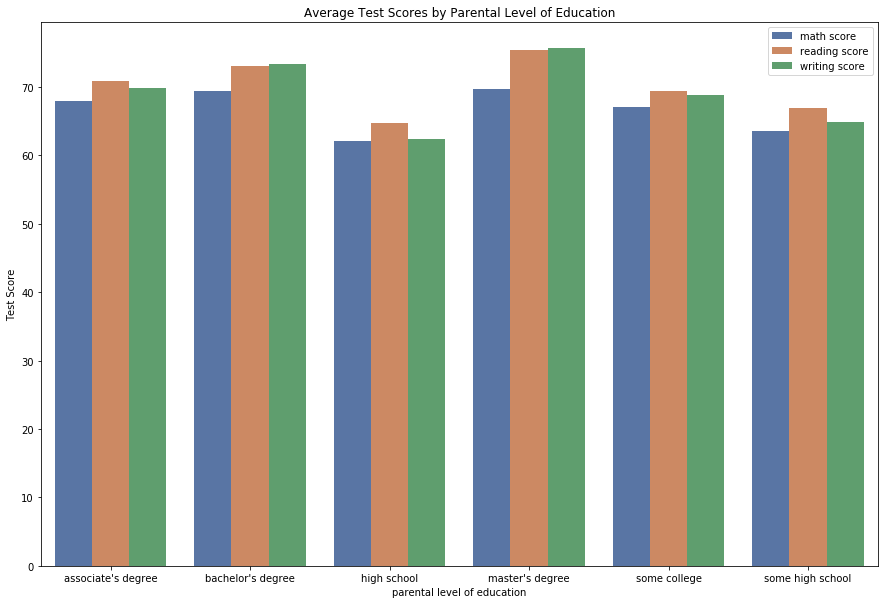

In [0]:
#graph the parental level of education vs average test scores

student_df4 = student_df3.melt('parental level of education', var_name='cols', value_name='vals')

plt.figure(figsize=(15,10))
ax = sns.barplot(x='parental level of education', y='vals', hue='cols', palette='deep', data=student_df4)
ax.set(title='Average Test Scores by Parental Level of Education', ylabel='Test Score')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.legend(handles=handles[0:], labels=labels[0:])



There certainly seems to be some differences here but lets check the statistics.

In [0]:
#using pandas method

some_high_school = student_df.loc[student_df['parental level of education']=='some high school'][['math score', 'reading score', 'writing score']]
high_school = student_df.loc[student_df['parental level of education']=='high school'][['math score', 'reading score', 'writing score']]
some_college = student_df.loc[student_df['parental level of education']=='some college'][['math score', 'reading score', 'writing score']]
associates = student_df.loc[student_df['parental level of education']=="associate's degree"][['math score', 'reading score', 'writing score']]
bachelors = student_df.loc[student_df['parental level of education']=="bachelor's degree"][['math score', 'reading score', 'writing score']]
masters = student_df.loc[student_df['parental level of education']=="master's degree"][['math score', 'reading score', 'writing score']]

print('Ttest for high school vs some high school(math score, reading score, writing score): ',ttest_ind(high_school, some_high_school))
print('Ttest for associates vs some high school(math score, reading score, writing score): ',ttest_ind(associates, some_high_school))
print('Ttest for associates vs high school(math score, reading score, writing score): ',ttest_ind(associates, high_school))
print('Ttest for bachelors vs some high school(math score, reading score, writing score): ',ttest_ind(bachelors, some_high_school))
print('Ttest for masters vs some high school(math score, reading score, writing score): ',ttest_ind(masters, some_high_school))
print('Ttest for masters vs high school(math score, reading score, writing score): ',ttest_ind(masters, high_school))
print('Ttest for masters vs associates(math score, reading score, writing score): ',ttest_ind(masters, associates))
print('Ttest for some college vs some high school(math score, reading score, writing score): ',ttest_ind(some_college, some_high_school))
print('Ttest for some college vs high school(math score, reading score, writing score): ',ttest_ind(some_college, high_school))
print('Ttest for some college vs associates(math score, reading score, writing score): ',ttest_ind(some_college, associates))
print('Ttest for some college vs masters(math score, reading score, writing score): ',ttest_ind(some_college, masters))
print('Ttest for bachelors vs associates(math score, reading score, writing score): ',ttest_ind(bachelors, associates))
print('Ttest for bachelors vs high school(math score, reading score, writing score): ',ttest_ind(bachelors, high_school))
print('Ttest for bachelors vs masters(math score, reading score, writing score): ',ttest_ind(bachelors, masters))
print('Ttest for bachelors vs some college(math score, reading score, writing score): ',ttest_ind(bachelors, some_college))

Ttest for high school vs some high school(math score, reading score, writing score):  Ttest_indResult(statistic=array([-0.86406295, -1.46128476, -1.58388853]), pvalue=array([0.38810861, 0.1447792 , 0.11406654]))
Ttest for associates vs some high school(math score, reading score, writing score):  Ttest_indResult(statistic=array([2.82005398, 2.71836022, 3.33172235]), pvalue=array([0.00504108, 0.00684677, 0.0009436 ]))
Ttest for associates vs high school(math score, reading score, writing score):  Ttest_indResult(statistic=array([3.94813253, 4.53802142, 5.34872564]), pvalue=array([9.24731427e-05, 7.44216780e-06, 1.46505455e-07]))
Ttest for bachelors vs some high school(math score, reading score, writing score):  Ttest_indResult(statistic=array([3.1967186 , 3.40392707, 4.6677331 ]), pvalue=array([1.54091929e-03, 7.56197172e-04, 4.62819853e-06]))
Ttest for masters vs some high school(math score, reading score, writing score):  Ttest_indResult(statistic=array([2.64425721, 3.72615741, 4.70758

In [0]:
#using the for loop

parent = student_df["parental level of education"].unique()
grouped_df = student_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(parent)):
        for j in range(i+1, len(parent)):
            print("t-test between groups {0} and {1}:".format(parent[i], parent[j]))
            print(stats.ttest_ind(
                student_df[student_df["parental level of education"]== parent[i]][var], 
                student_df[student_df["parental level of education"]== parent[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

Again, we have some tests with statistical significane and some without. 

# 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

In [0]:
#lunch type vs average test scores
student_df5 = student_df.groupby('lunch').mean()[['math score', 'reading score', 'writing score']].reset_index()
student_df5

,lunch,math score,reading score,writing score
0,free/reduced,58.921127,64.653521,63.022535
1,standard,70.034109,71.654264,70.823256


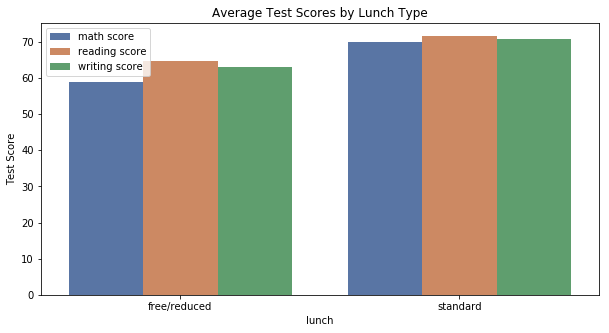

In [0]:
#graph the lunch type vs average test scores

student_df6 = student_df5.melt('lunch', var_name='cols', value_name='vals')

plt.figure(figsize=(10,5))
ax = sns.barplot(x='lunch', y='vals', hue='cols', palette='deep', data=student_df6)
ax.set(title='Average Test Scores by Lunch Type', ylabel='Test Score')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.legend(handles=handles[0:], labels=labels[0:])

In [0]:
#run the ttest of lunch type vs average test scores
ttest_ind(student_df[student_df.lunch == 'free/reduced'][['math score', 'reading score', 'writing score']],
         student_df[student_df.lunch == 'standard'][['math score', 'reading score', 'writing score']])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

There is certainly a difference between the lunch types with respect to their performances on the exams. Food is brainpower, the human brain literally feeds off of food, specifically sugars. Without food, or less food, it makes sense that students' scores would suffer.

# 3. Does the test preparation course seem to have an effect on the exam performances?

In [0]:
#test preparation course vs average test scores
student_df7 = student_df.groupby('test preparation course').mean()[['math score', 'reading score', 'writing score']].reset_index()
student_df8 = student_df.rename(columns = {'test preparation course':'test_prep'})
student_df7

,test preparation course,math score,reading score,writing score
0,completed,69.695531,73.893855,74.418994
1,none,64.077882,66.534268,64.504673


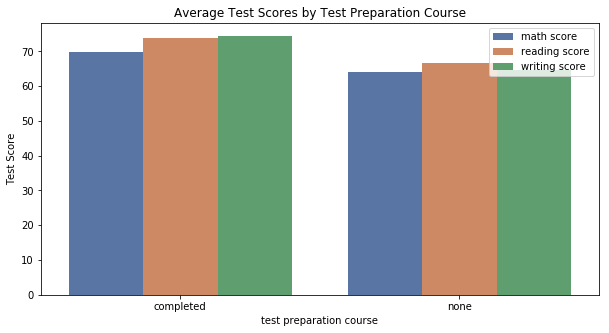

In [0]:
#graph test preparation course vs average test scores
student_df9 = student_df7.melt('test preparation course', var_name='cols', value_name='vals')

plt.figure(figsize=(10,5))
ax = sns.barplot(x='test preparation course', y='vals', hue='cols', palette='deep', data=student_df9)
ax.set(title='Average Test Scores by Test Preparation Course', ylabel='Test Score')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:])
ax.legend(handles=handles[0:], labels=labels[0:])

In [0]:
#run the ttest
ttest_ind(student_df8[student_df8.test_prep == 'completed'][['math score', 'reading score', 'writing score']],
         student_df8[student_df8.test_prep == 'none'][['math score', 'reading score', 'writing score']])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

Students who take the test prep course seem to do better on their exam scores, as can be seen from the bar chart and statistic significance.

# 4. Which 2 exam scores are most correlated with each other?

In [0]:
#run the correlation function for the dataset
student_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Reading and writing scores are more correlated than any other combination.